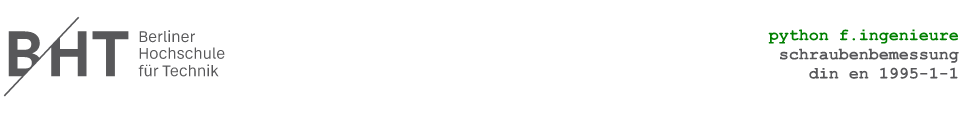

# Tragfähigkeit von Schrauben
*DIN EN 1995-1-1 Abs. 8 & ETA-11/0190*

In [82]:
from math import sqrt, cos, sin, pi  #Mathematische Funktionen
import pandas as pd                  #Datenstrukturen und DataFrames
import handcalcs.render              #Darstellung formattierter Gleichungen

In [83]:
#Listen der herstellerspezifischen Kennwerte für Würth ASSY plus VG

##Liste der Durchmesser [mm]
L_d = [6, 8, 10, 12]

##Liste der Schraubenlängen [mm]
L_L = [[120,140,160,180,200,220,240,260], 
       [120,140,160,180,200,220,240,260,280,300,330,380,430,480,530,580], 
       [120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,430,480,530,580,600,650,700,750,800], 
       [120,140,160,180,200,220,240,260,280,300,380,480,600]]

##Liste der char. Ausziehparameter [N/mm^2]
L_f_axk = [11.5, 11, 10, 10]

##Liste der Zugtragfähigkeiten [kN]
L_f_tensk = [11, 20, 32, 45]

##Liste der Kopfdurchmesser [mm]
L_d_h = [14, 22, 25.2, 29.4]

##Liste der char. Kopfdurchziehparameter [N/mm^2]
L_f_head = [13, 13, 10, 10]

In [84]:
#Eingangsparameter
##Nachweisführung
k_mod = 0.6  #Widerstandsbeiwert
gamma = 1.3  #gamma

##Verbindungsmittel
d = 6        #mm - Durchmesser (6,8,10,12)
L = 240      #mm - Schraubenlänge
t_1 = 100    #mm - Seitenholzdicke 
t_Blech = 0  #mm - Blechdicke 
rho_k = 350  #$kg/m^3$ - Holzrohdichte
alpha = 15   #Grad - Winkel Kraft zur Faserrichtung

##Einwirkung
F_tEd = 2    #kN - Zugkraft
F_vEd = 2    #kN - Querkraft

## Eingabewerte
### Verbindungsmittel

In [85]:
%%render params
d #mm - Durchmesser
L #mm - Schraubenlänge

<IPython.core.display.Latex object>

### Holz

In [86]:
%%render params
rho_k #$kg/m^3$ - Holzrohdichte

<IPython.core.display.Latex object>

### Nachweisführung

In [87]:
%%render params 2
k_mod
gamma

<IPython.core.display.Latex object>

### Einwirkung

In [88]:
%%render params 2
F_tEd    #kN - Zugkraft
F_vEd    #kN - Querkraft

<IPython.core.display.Latex object>

In [89]:
#Auswertung der eingelesenen Daten

#Umrechnung von alpha in Bogenmaß
alph = alpha*pi/180

#Effektive Länge der Schraube
t_2 = L-t_1
if t_2 == 0:
    l_ef = (t_1-t_Blech)
else: 
    l_ef = t_2

#Materialkennwerte
##Listen der herstellerspezifischen Kennwerte
L_d = [6, 8, 10, 12]
L_f_axk = [11.5, 11, 10, 10]
L_f_tensk = [11, 20, 32, 45]
L_d_h = [14, 22, 25.2, 29.4]
L_f_headk = [13, 13, 10, 10]

##Index
index = L_d.index(d)
d_h = L_d_h[index]
f_headk = L_f_headk[index]
f_axk = L_f_axk[index]
f_tensk = L_f_tensk[index]
f_hk = round((0.082*rho_k*d**(-0.3)),2)
M_yrk = round(0.15*600*d**(2.6),2)

## Axialtragfähigkeit
DIN EN 1995-1-1 Abs. 8.3

### Ausziehwiderstand

In [90]:
%%render 2
k_axk = 0.3+(0.7*alpha)/45 if alpha <= 45 else  1
F_axrk1 = (k_axk*f_axk*d*l_ef) * (rho_k/350)**0.8 #N
F_axRk1 = F_axrk1/1000 #kN

<IPython.core.display.Latex object>

### Kopfdurchziehwiderstand

In [91]:
%%render 2
F_headrk = f_headk*(d_h)**2 * (rho_k/350)**0.8 #N
F_headRk = F_headrk/1000 #kN

<IPython.core.display.Latex object>

### Zugfestigkeit

In [92]:
%%render 
F_tRk = f_tensk #kN

<IPython.core.display.Latex object>

### Axialtragfähigkeit

In [109]:
if t_Blech != 0 or t_2 > 4*d:
    display(Markdown("""$Kopfdurchziehtragfähigkeit$  $wird$  $nicht$  $berücksichtigt.$"""))
    display(Markdown("""$F_{axRk}$ = min($F_{axRk1}$, $F_{tRk}$)"""))
    
    
elif t_Blech == 0 or t_2 < 4*d:
    display(Markdown("""$Kopfdurchziehtragfähigkeit$  $wird$  $berücksichtigt.$"""))
    display(Markdown("""$F_{axRk}$ = min($F_{axRk1}$, $F_{tRk}$, $F_{headrk}$)"""))


$Kopfdurchziehtragfähigkeit$  $wird$  $nicht$  $berücksichtigt.$

$F_{axRk}$ = min($F_{axRk1}$, $F_{tRk}$)

In [94]:
if t_Blech != 0 or t_2 > 4*d:
    F_axRk = min(F_axRk1, F_tRk)
    F_axrk = min(F_axrk1, F_tRk*1000)
elif t_stahl == 0 or t_2 < 4*d:
    F_axRk = min(F_axRk1, F_headRk, F_tRk)
    F_axrk = min(F_axrk1, F_headrk, F_tRk*1000)

In [95]:
%%render 2
F_axRk #kN - Axialtragfähigkeit

<IPython.core.display.Latex object>

## Schertragfähigkeit
DIN EN 1995-1-1 Abs. 8.3

In [96]:
if t_Blech == 0:
    display(Markdown("""$Holz-Holz-Verbindung: einschnittig (N)$"""))

elif t_Blech >= d: 
    display(Markdown("""$Stahl-Holz-Verbindung: dickes Stahlblech (N)$"""))
    
elif t_Blech < d and t_Blech > 0:  
    display(Markdown("""$Stahl-Holz-Verbindung: dünnes Stahlblech (N)$"""))


$Holz-Holz-Verbindung: einschnittig (N)$

In [97]:
%%render long 1
if t_Blech == 0: F_vk1 = f_hk*t_1*d; F_vk2 = f_hk*t_2*d; F_vk3 = (f_hk*t_1*d)/2 * ( sqrt(1+2*(1+t_2/t_1+(t_2/t_1)**2)+(t_2/t_1)**2)-(1+t_2/t_1))+F_axrk/4  

<IPython.core.display.Latex object>

In [98]:
%%render long 1
if t_Blech == 0: F_vk4 = 1.05*(f_hk*t_1*d)/(3) * (sqrt(4+(12*M_yrk)/(f_hk*t_1**2*d))-1)+F_axrk/4; F_vk5 = 1.05*(f_hk*t_2*d)/(3) * (sqrt(4+(12*M_yrk)/(f_hk*t_2**2*d))-1)+F_axrk/4; F_vk6 = 1.15*sqrt(2*M_yrk*f_hk*d)+F_axrk/4;F_vrk = min(F_vk1, F_vk2, F_vk3, F_vk4, F_vk5, F_vk6)    

<IPython.core.display.Latex object>

In [99]:
%%render 1
if t_Blech >= d: F_vk1 = f_hk*t_1*d; F_vk2 = f_hk*t_1*d*(sqrt(2+(4*M_yrk)/(f_hk*d*t_1**2))-1)+F_axrk/4; F_vk3 = 2.3*sqrt(M_yrk*f_hk*d)+F_axrk/4; F_vrk = min(F_vk1, F_vk2, F_vk3) #N
    
elif t_Blech < d and t_Blech != 0:F_vk1 = 0.4*f_hk*t_1*d; F_vk2 = 1.15*sqrt(2*M_yrk*f_hk*d)+F_axrk/4; F_vrk = min(F_vk1, F_vk2) #N

<IPython.core.display.Latex object>

## Ergebnisse der Tragfähigkeiten

### Charkteristische Werte

In [101]:
%%render params 2
F_axRk #kN - Axialtragfähigkeit (char.)
F_vRk = F_vrk/1000 #kN - Schertragfähigkeit

<IPython.core.display.Latex object>

### Bemessungswerte

In [102]:
%%render 2
F_axRd =  F_axRk*k_mod/gamma #kN - Axialtragfähigkeit
F_vRd =  F_vRk*k_mod/gamma #kN - Schertragfähigkeit

<IPython.core.display.Latex object>

### Nachweis

In [105]:
%%render 2
eta_ax =  F_tEd/F_axRd #Scherung
eta_v =  F_vEd/F_vRd #Axial

<IPython.core.display.Latex object>